# Data Visualization Project Skyline Society
<p>
XYZ Corporation uses data to develop marketing profiles on people. These profiles are then sold to numerous companies for marketing purposes. You work at XYZ as part of a team of data analysts. Your team has just been given a new project working with UVW College, a local college looking to bolster enrollment. UVW has chosen a salary as a key demographic to determine criteria for marketing its degree programs. You must develop marketing profiles using data supplied by the United States Census Bureau, and you will be focusing on $50,000 as a key number for salary. There are many key variables that must be assessed for individuals making less than and more than $50,000, including age, gender, education status, marital status, occupation, etc.

For example, if the data show that the majority of individuals making less than $50,000 is under 34 years old, male, single, and has a high school diploma, the college can market to this demographic with tuition amounts, program concentrations, and even ground or online programs appropriate to this demographic.

To achieve its enrollment target, the marketing team at UVW would like to develop an application to find the factors that determine the individual's income. One way to accomplish this is to use the United States Census Bureau data provided by the XYZ company. The marketing team wants to group the factors that can be used in the development of their proposed model/application. They also want the application to predict the income of an individual based on different values of the input parameters so that they can tailor their marketing efforts when reaching out to the individuals.
<p>

In [1]:
#import libraries and reading data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("adult.data", names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "amount"], delimiter=",", index_col=False)

In [2]:
#Separate the data into the the required demogrphics
data_more = data[data['amount'] == " >50K"]
data_less = data[data['amount'] == " <=50K"]

In [3]:
work_less_data = data_less['workclass']
print(work_less_data.value_counts())
work_more_data = data_more['workclass']
#print(work_more_data.value_counts())

 Private             17733
 Self-emp-not-inc     1817
 ?                    1645
 Local-gov            1476
 State-gov             945
 Federal-gov           589
 Self-emp-inc          494
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [4]:
#Sanity schecking.
print(len(data))
print(len(data_less))
print(len(data_more))
print(len(data_less) + len(data_more) == len(data))

32561
24720
7841
True


 Private             4963
 Self-emp-not-inc     724
 Self-emp-inc         622
 Local-gov            617
 Federal-gov          371
 State-gov            353
Name: workclass, dtype: int64


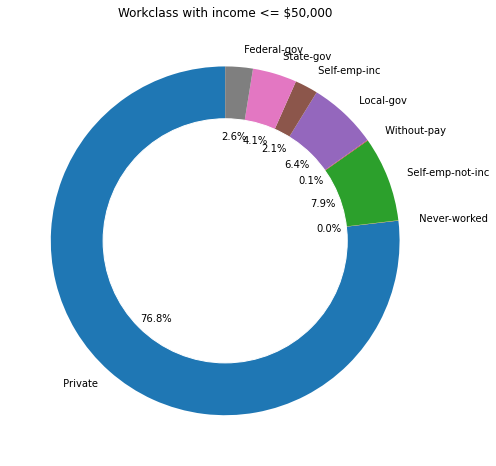

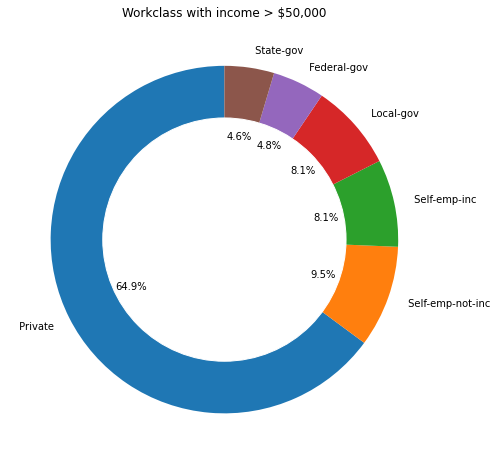

In [5]:
"""
Circle plots and pie charts for workcalss Splits
"""
work_data_L = data_less[data_less.workclass != ' ?']
work_data_less = work_data_L['workclass']
work_data_M = data_more[data_more.workclass != ' ?']
work_data_more = work_data_M['workclass']

plt.figure(figsize = (7, 7))

under_counts = work_data_less.value_counts()
under_counts = under_counts.reindex(index = [' Private', ' Never-worked', ' Self-emp-not-inc', ' Without-pay', ' Local-gov', ' Self-emp-inc', ' State-gov', ' Federal-gov'])

over_counts = work_data_more.value_counts()
print(over_counts)

plt.pie(under_counts, labels = under_counts.index.tolist(), autopct='%1.1f%%', startangle=90,)

circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.tight_layout()
plt.title("Workclass with income <= $50,000")
plt.show()

plt.figure(figsize = (7, 7))
plt.pie(over_counts, labels = over_counts.index.tolist(), autopct='%1.1f%%', startangle=90,)

circle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.tight_layout()
plt.title("Workclass with income > $50,000")
plt.show()



0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object
30725


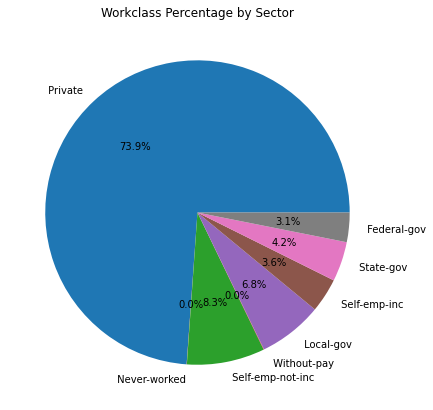

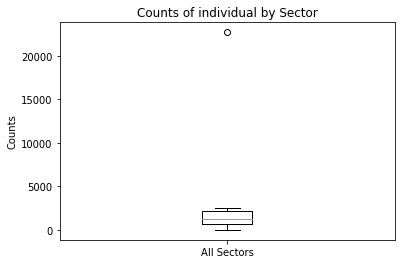

In [11]:
"""
Combined workclass pie and box/whisker
"""
allwork = data[data.workclass != ' ?']
filtered_work = allwork['workclass']
print(filtered_work.head())
print(len(filtered_work))

plt.figure(figsize = (7, 7))
allwork_counts = filtered_work.value_counts()

allwork_counts = allwork_counts.reindex(index = [' Private', ' Never-worked', ' Self-emp-not-inc', ' Without-pay', ' Local-gov', ' Self-emp-inc', ' State-gov', ' Federal-gov'])

plt.pie(allwork_counts, labels=allwork_counts.index.tolist(), autopct='%1.1f%%')
plt.title("Workclass Percentage by Sector")
plt.show()


"""
Box and Whisker Plot for Work Class
"""
plt.boxplot(allwork_counts.values, labels=['All Sectors'])
plt.ylabel("Counts")
plt.title("Counts of individual by Sector")

plt.show()


(17733, 1817, 1476, 945, 589, 494, 14, 7) (4963, 724, 617, 353, 371, 622, 0, 0)


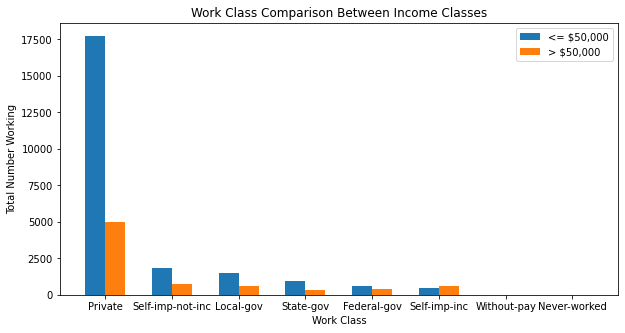

0.7386818551668023


In [9]:
import numpy as np
N = 8
blue = (17733, 1817, 1476, 945, 589, 494, 14, 7)
orange = (4963, 724, 617, 353, 371, 622, 0, 0)

print(blue, orange)
ind = np.arange(N)
plt.figure(figsize=(10,5))

width = 0.3
xlabels = ['Private', 'Self-imp-not-inc', 'Local-gov', 'State-gov', 'Federal-gov', 'Self-imp-inc', 'Without-pay', 'Never-worked']


plt.bar(ind, blue, width, label="<= $50,000")
plt.bar(ind+width, orange, width, label="> $50,000")

plt.ylabel("Total Number Working")
plt.xlabel("Work Class")
plt.title("Work Class Comparison Between Income Classes")
plt.xticks(ind + width/2, xlabels)

plt.legend(loc='best')
plt.show()

print((blue[0] + orange[0])/(sum(blue) + sum(orange)))

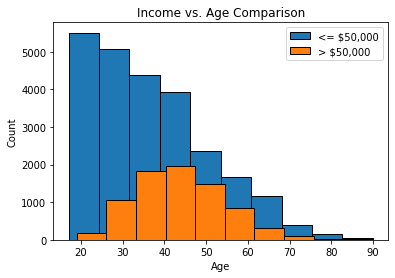

24720 7841
less 0.7591904425539756
more 0.2408095574460244


([<matplotlib.patches.Wedge at 0x258f3d89c40>,
 [Text(1.0859722902711433, 0.17511192067717077, '0-19'),
  Text(0.5020685663536917, 0.9787375310467812, '20-29'),
  Text(-0.9967753077291012, 0.46523003546799935, '30-39'),
  Text(-0.5120518128442456, -0.9735517145806493, '40-49'),
  Text(0.651901375509756, -0.8860161378939372, '50-59'),
  Text(1.045606547101076, -0.34162398724235615, '60-69'),
  Text(1.0979749592984165, -0.06671573093087478, '70-100')],
 [Text(0.5923485219660781, 0.09551559309663858, '5.1%'),
  Text(0.27385558164746815, 0.533856835116426, '24.7%'),
  Text(-0.5436956223976914, 0.25376183752799963, '26.5%'),
  Text(-0.2793009888241339, -0.5310282079530814, '22.0%'),
  Text(0.35558256845986685, -0.48328152976032934, '13.6%'),
  Text(0.5703308438733141, -0.1863403566776488, '6.2%'),
  Text(0.5988954323445908, -0.03639039868956806, '1.9%')])

<Figure size 432x288 with 0 Axes>

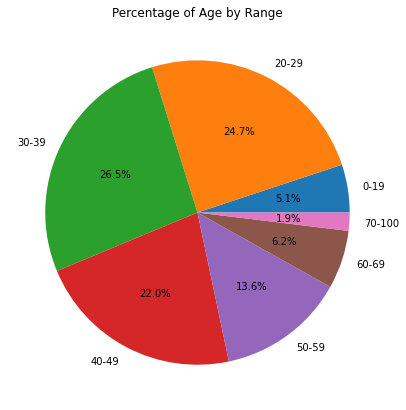

In [58]:
# Histogram of Age rangess <=50K
age_data = data_less["age"]
new_age_date = data_more['age']
plt.hist(age_data, edgecolor='black',  label="<= $50,000")
plt.hist(new_age_date, edgecolor='black', label='> $50,000')
plt.title("Income vs. Age Comparison")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

print(len(age_data), len(new_age_date))

print("less", len(age_data)/(len(age_data) + len(new_age_date)))
print("more", len(new_age_date)/(len(age_data) + len(new_age_date)))
# plt.hist(new_age_date, edgecolor='black')
# plt.title("Income >=50k")
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.show()


# plt.boxplot(age_data, showmeans=True)
# plt.title("Age <=50K")
# plt.show()

ranges = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69','70-100']
from collections import defaultdict
age_counts = defaultdict(int)

for num in data.age:
    if num <= 19:
        age_counts[ranges[0]] +=1 
    elif num <= 29:
        age_counts[ranges[1]] += 1
    elif num <= 39:
        age_counts[ranges[2]] += 1
    elif num <= 49:
        age_counts[ranges[3]] += 1
    elif num <= 59:
        age_counts[ranges[4]] += 1
    elif num <= 69:
        age_counts[ranges[5]] += 1
    else:
        age_counts[ranges[-1]] += 1

pie_nums = [age_counts[x] for x in ranges]
plt.tight_layout()
plt.figure(figsize=(7,7))
plt.title("Percentage of Age by Range")
plt.pie(pie_nums, labels=ranges,  autopct='%1.1f%%')


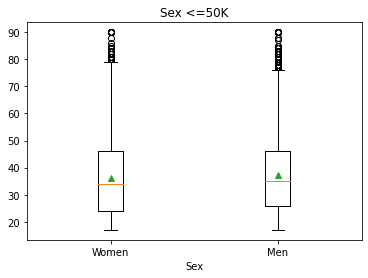

               age        fnlwgt  education-num  capital-gain  capital-loss  \
count  9592.000000  9.592000e+03    9592.000000   9592.000000   9592.000000   
mean     36.210801  1.859994e+05       9.820475    121.986134     47.364470   
std      14.256801  1.034420e+05       2.306665    858.153678    296.489112   
min      17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%      24.000000  1.174912e+05       9.000000      0.000000      0.000000   
50%      34.000000  1.763210e+05      10.000000      0.000000      0.000000   
75%      46.000000  2.294560e+05      11.000000      0.000000      0.000000   
max      90.000000  1.484705e+06      16.000000  34095.000000   4356.000000   

       hours-per-week  
count     9592.000000  
mean        35.916701  
std         11.786303  
min          1.000000  
25%         30.000000  
50%         40.000000  
75%         40.000000  
max         99.000000  
                age        fnlwgt  education-num  capital-gain  capital-